# Post-NOD risk

Post-NOD, we want linear decline between ages 63-65 FROM NOD rate TO 1.8x the SEER incidence rate. <br> 
Following this, it will just be double the average incidence rate until age 85. 

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from csaps import csaps

In [21]:
seer_inc = pd.read_csv("../data/seer_incidence_1y.csv")
nod_risk = pd.read_csv("../data/seer_incidence_nod.csv")

[532.07960341 368.83011621 205.580629    42.3311418 ]


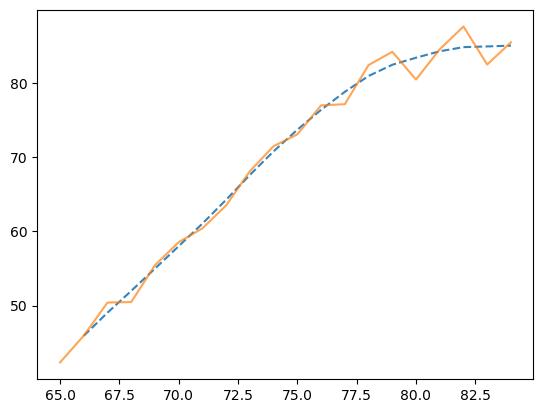

[368.83011621 205.580629    42.3311418   45.92725779  49.04607808
  51.98517001  54.99210013  58.01441755  61.05961022  64.27744528
  67.6199297   70.81230148  73.72110279  76.40236605  78.82495481
  80.9661676   82.47575767  83.42889262  84.29716555  84.85693653
  84.95012265  85.0593047 ]


,Age,LRDU Rate,pLocal,pRegional,pDistant,LocalU,RegionalU,DistantU
43,63,368.830116,0.072975,0.309404,0.617621,1.447510,6.137206,12.250877
44,64,205.580629,0.067989,0.317847,0.614164,1.479033,6.914476,13.360592
45,65,42.331142,0.071035,0.305617,0.623348,1.670557,7.187281,14.659463
46,66,45.927258,0.068874,0.314702,0.616424,1.758215,8.033689,15.736024
47,67,49.046078,0.075443,0.313165,0.611392,2.113029,8.771199,17.124048
48,68,51.985170,0.082337,0.315803,0.601859,2.309126,8.856617,16.878968
49,69,54.992100,0.077752,0.307673,0.614575,2.394843,9.476624,18.929536
50,70,58.014418,0.084359,0.319744,0.595897,2.744452,10.402224,19.386342
51,71,61.059610,0.086122,0.322179,0.591699,2.890910,10.814788,19.861943
52,72,64.277445,0.092071,0.304382,0.603547,3.248837,10.740488,21.296905


In [77]:
# Create linear decrease between age 62 and 65
nod_risk_62 = nod_risk.query('Age == 62')['LRDU Rate'].iloc[0]
double_seer_inc_65 = seer_inc.query('Age == 65')['LRDU Rate'].iloc[0] * 1.8
nod_decline = np.linspace(nod_risk_62, double_seer_inc_65, 4)
print(nod_decline)

# Plot smoothed double incidecnce
double_seer_inc = seer_inc.query('Age >= 65').copy() 
double_seer_inc['LRDU Rate'] *= 1.8
double_df = double_seer_inc.drop(columns=['Unnamed: 0', 'Distant Rate', 'Localized Rate', 'Regional Rate', 'Unknown/unstaged Rate', 'LRD Rate'])
double_df2 = csaps(np.arange(65,85,1), double_df['LRDU Rate'], smooth=0.3)(np.arange(66,85,1))
plt.plot(np.arange(66,85,1), double_df2, linestyle='--', alpha=0.9, label="Smoothed")
plt.plot(np.arange(65,85,1), double_df['LRDU Rate'], linestyle='-', alpha=0.7, label="Original")
plt.show()

# Concat new incidences for ages 63+
new_rates = np.concatenate([nod_decline, double_df2], axis=0)[1:]
print(new_rates)

# Create new combined df for ages 63+
new_df=seer_inc.query('Age > 62').copy()
new_df['LRDU Rate'] = new_rates
new_df = new_df.drop(columns=['Unnamed: 0', 'Distant Rate', 'Localized Rate', 'Regional Rate', 'Unknown/unstaged Rate', 'LRD Rate'])
new_df

In [78]:
new_df.to_csv("../data/seer_incidence_post_nod.csv")